In [1]:
import numpy as np
import copy
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [158]:
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

Text(0.5, 0.92, 'Gaussian Mxixture Model')

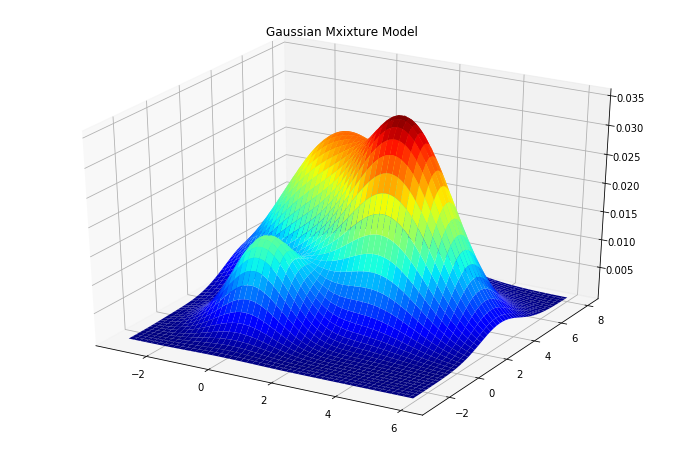

In [139]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model')

In [239]:
# create data set
n = 400
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
X = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

In [2]:
n=4
#number of samples per class: n
k=2
#number of classes: k
d=4
#dimensionality of samples: d
mus=np.random.random((k,d))*20-10 
#mean of the multivariate normal distribution | mus[i,j] is the mean for the ith cluster at the jth dimension
sigma=[np.eye(d) for i in range(k)]
#standard deviations are all assumed to be one. As the covariance matrix is identity the dimensions can be sampled independently
Pc=np.ones(k)/k
#setting priors: Pc

#Data Generation
X=[]
for i in range(n):
    for j in range(k):
#for each class generate n tuples of size d, taken from the distribution N(mus[j],1)
        point=[mean+np.random.randn() for mean in mus[j]]
        X.append(point)
#we have our dataset, where each point is a d+1 dimensional tuple where the last position represents its class 

X = np.asarray(X)

In [3]:
def w_mat(i,j):
    a = multivariate_normal.pdf(\
            X[index_matrix[i][j][0]],\
            mean=new_mus[index_matrix[i][j][1]],\
            cov=new_cov[index_matrix[i][j][1]],\
            allow_singular=True\
        )
    b = new_priors[index_matrix[i][j][1]]
    return a*b

def tabulate(x, y, f):
   """Return a table of f(x, y)."""
   #* is to unpack the two arrays which results after meshing
   return np.vectorize(f)( * np.meshgrid(x, y))

index_matrix = np.empty((X.shape[0],k),dtype=(int,2))
for i in range(index_matrix.shape[0]):
    for j in range(index_matrix.shape[1]):
        index_matrix[i][j] = (i,j)

def covid(n,i):
    # print(sum_w[i])
    co_vid = np.zeros((X.shape[1],X.shape[1]),dtype=float)
    for j in range(n):
        co_vid += W[i][j] * (((X[j] - new_mus[i]).T) @ (X[j] - new_mus[i]))
    return co_vid

In [15]:
# t = 0
# k = 2
d = X.shape[1]
n = X.shape[0]
# old_mus = np.array([np.random.rand(d) for _ in range(k)])
random_rows = np.random.choice(X.shape[0], size=k, replace=False)
# old_mus = copy.deepcopy(X[random_rows, :])
old_mus = np.random.random((k,d))*20-10 
# old_mus = np.random.random((k,d))*np.max(X)-np.min(X)
new_mus = copy.deepcopy(old_mus)
print('original',mus)
print("initial", new_mus)

old_cov = np.asarray([np.eye(d) for _ in range(k)])
new_cov = copy.deepcopy(old_cov)

old_priors = np.full((k),1/k)
new_priors = copy.deepcopy(old_priors)

eps = 1e-7
t = 0
meh = 1
# while (np.linalg.norm(new_mus - old_mus) > eps) or (t==0):
while (meh > eps) or (t==0):
    # print("old",old_mus)
    # print("new",new_mus)
    t += 1

    #unnormalised
    W_temp = copy.deepcopy(tabulate(list(range(X.shape[0])),list(range(k)),w_mat))
    temp = copy.deepcopy(W_temp)
    #normalised
    W = copy.deepcopy(temp/temp.sum(axis=0))
    # W = copy.deepcopy(W_temp)

    #get sum of W for each cluster
    temp = copy.deepcopy(W)
    sum_w = copy.deepcopy(temp.sum(axis=1))


    old_mus = copy.deepcopy(new_mus)
    #unnormalised
    new_mus_temp = copy.deepcopy(W @ X)
    temp = copy.deepcopy(new_mus_temp)
    #normalised
    new_mus = copy.deepcopy(temp/sum_w[:,None])
    # print(t,new_mus)

    old_cov = copy.deepcopy(new_cov)
    #unormalised
    # new_cov = copy.deepcopy([(sum_w[a] * ((X-new_mus[a]).T) @ ((X-new_mus[a])))/sum_w[a] for a in range(k)])
    # new_cov_temp = copy.deepcopy(
    #     [
    #         ( 
    #             ((np.sqrt((np.expand_dims(W[a], axis=0))) @ (X-new_mus[a]))).T @ 
    #             ((np.sqrt((np.expand_dims(W[a], axis=0))) @ (X-new_mus[a])))
    #         )
    #         for a in range(k)
    #     ]
    # )
    new_cov_temp = copy.deepcopy([covid(n,a) for a in range(k)])
    temp = copy.deepcopy(new_cov_temp)
    new_cov = copy.deepcopy([temp[a]/sum_w[a] for a in range(k)])
    # new_cov = copy.deepcopy(new_cov_temp)

    old_priors = copy.deepcopy(new_priors)
    #normalised
    # print("W_bef",W_temp)
    new_priors = copy.deepcopy(sum_w/n)
    # print(W_temp)
    # print("new_mus",new_mus)
    # print("old_mus",old_mus)
    # print("eps1",np.linalg.norm(new_mus - old_mus))
    meh=np.sum([np.linalg.norm(new_mus[i]-old_mus[i]) for i in range(k)])
    # print("new_mus",new_mus)
    # print("old_mus",old_mus)
    print("eps2",meh)

print("final", t,new_mus)


original [[-5.52072854 -0.40161268  0.9770413  -9.71847391]
 [-2.78267837 -6.05530793  2.99457092  4.80251517]]
initial [[ 4.65881823 -3.51686481 -8.18003089 -9.11783597]
 [ 7.96568942  0.89519681 -1.72597775  5.58484585]]
eps2 27.509262598397342
eps2 2.1720278689827985
eps2 10.762524539770276
eps2 1.9054351656425195
eps2 0.08678002233628321
eps2 0.003901894676637263
eps2 0.00017540616119255656
eps2 7.885166923707678e-06
eps2 3.544678017629944e-07
eps2 1.59346572359132e-08
final 10 [[-4.18798826 -3.15606576  1.58297455 -2.25412066]
 [-4.18798826 -3.15606576  1.58297455 -2.25412066]]


In [17]:
# t = 0
# k = 2
d = X.shape[1]
n = X.shape[0]
# old_mus = np.array([np.random.rand(d) for _ in range(k)])
# random_rows = np.random.choice(X.shape[0], size=k, replace=False)
# old_mus = copy.deepcopy(X[random_rows, :])
old_mus = np.random.random((k,d))*20-10 
# old_mus = np.random.random((k,d))*np.max(X)-np.min(X)
new_mus = copy.deepcopy(old_mus)
print('original',mus)
print("initial", new_mus)

old_cov = np.asarray([np.eye(d) for _ in range(k)])
new_cov = copy.deepcopy(old_cov)

old_priors = np.full((k),1/k)
new_priors = copy.deepcopy(old_priors)

eps = 1e-5
t = 0

while (np.linalg.norm(new_mus - old_mus) > eps) or (t==0):
    t += 1

    #unnormalised
    W = tabulate(list(range(X.shape[0])),list(range(k)),w_mat)
    #normalised
    W = copy.deepcopy(W/W.sum(axis=0))

    #get sum of W for each cluster
    sum_w = copy.deepcopy(W.sum(axis=1))


    old_mus = copy.deepcopy(new_mus)
    #unnormalised
    new_mus = copy.deepcopy(W @ X)
    #normalised
    new_mus = copy.deepcopy(new_mus/sum_w[:,None])
    # print(t,new_mus)

    old_cov = copy.deepcopy(new_cov)
    #unormalised
    new_cov_temp = copy.deepcopy([covid(n,a) for a in range(k)])
    temp = copy.deepcopy(new_cov_temp)
    new_cov = copy.deepcopy([temp[a]/sum_w[a] for a in range(k)])
    # new_cov = copy.deepcopy(new_cov_temp)

    old_priors = copy.deepcopy(new_priors)
    #normalised
    # print("W_bef",W_temp)
    new_priors = copy.deepcopy(sum_w/n)
    # print(W_temp)
    print(np.linalg.norm(new_mus - old_mus))

print("final", t,new_mus)


original [[-5.52072854 -0.40161268  0.9770413  -9.71847391]
 [-2.78267837 -6.05530793  2.99457092  4.80251517]]
initial [[-2.42165592 -4.02900194  7.26614898  7.18860713]
 [ 3.85278468 -5.48891145 -8.59733272  1.54599054]]
21.04204427920998
0.5910400322658017
7.572258691608576
0.04148197390119514
0.0021504790558628376
9.667840026635501e-05
4.346078211923528e-06
final 7 [[-4.1879882  -3.15606583  1.58297455 -2.25412048]
 [-4.18798827 -3.15606575  1.58297455 -2.25412069]]


In [30]:

def loglikelihood(data,ms,sigs,C):
    d,k,n=len(data[0]),len(sigs),len(data)
    
    W=np.zeros((k,n))
    for j in range(n):
        for i in range(k):
            W[i,j]=(multivariate_normal.pdf(data[j],ms[i],sigs[i],allow_singular=True)*C[i]/sum([multivariate_normal.pdf(data[j],ms[x],sigs[x],allow_singular=True)*C[x] for x in range(k)]))
    return W

n=len(X)
#Initialize EM model parameters
t_data=[i[:d] for i in X]
means=np.random.random((k,d))*20-10 
sigmas=[np.eye(d) for i in range(k)]
eps=10
its=0
#calculate likelihood: main loop
while eps>1e-5:
    W=loglikelihood(t_data,means,sigmas,Pc)
    denoms=[sum(W[i,:]) for i in range(k)]
    old_mean=means
    means=np.matmul(W,t_data)
    means=[means[i]/denoms[i] for i in range(k)]
    sigmas=[np.sum([W[i,j]/(denoms[i])*np.matmul(np.transpose(np.expand_dims(t_data[j]-means[i], axis=0)),np.expand_dims(t_data[j]-means[i], axis=0)) for j in range(n)],axis=0) for i in range(k)]
    Pc=[sum(W[i,:])/n for i in range(k)]
    # eps=np.linalg.norm(np.asarray(means)-np.asarray(old_mean))
    eps=np.sum([np.linalg.norm(means[i]-old_mean[i]) for i in range(k)])
    its+=1
    print(eps)

34.716842773754344
1.1867793003091651
0.22264345390465332
5.729419672881719
0.13826684396011293
0.0


In [31]:
print('Original means of the data for class 1 are: {} and the predicted means are {}'.format(mus[0],means[0]))
print('Original means of the data for class 2 are: {} and the predicted means are {}'.format(mus[1],means[1]))
print('The Original covariance matrix is an Identity matrix for both the classes.')
print('Predicted covariance matrices of the data for class 1 is: \n {} \n and for class 2 is \n {}'.format(sigmas[0],sigmas[1]))


Original means of the data for class 1 are: [-5.52072854 -0.40161268  0.9770413  -9.71847391] and the predicted means are [-1.81139573 -5.76828276  1.61966573  4.32248876]
Original means of the data for class 2 are: [-2.78267837 -6.05530793  2.99457092  4.80251517] and the predicted means are [-6.56458079 -0.54384876  1.54628338 -8.83073007]
The Original covariance matrix is an Identity matrix for both the classes.
Predicted covariance matrices of the data for class 1 is: 
 [[ 0.06045171  0.12110212 -0.11131555 -0.04443935]
 [ 0.12110212  0.38644179 -0.52697076  0.20230061]
 [-0.11131555 -0.52697076  0.92491793 -0.67578338]
 [-0.04443935  0.20230061 -0.67578338  0.8825427 ]] 
 and for class 2 is 
 [[ 0.25993719  0.04811776  0.17757448 -0.0715953 ]
 [ 0.04811776  1.00806708 -0.15732967  0.03609455]
 [ 0.17757448 -0.15732967  0.39641272 -0.1331086 ]
 [-0.0715953   0.03609455 -0.1331086   0.04558029]]


In [541]:
meh = copy.deepcopy(
    [
        ( 
            ((np.sqrt((np.expand_dims(W[a], axis=0))) @ (X-new_mus[a]))).T @ 
            ((np.sqrt((np.expand_dims(W[a], axis=0))) @ (X-new_mus[a])))
        )
        for a in range(k)
    ]
)
new_cov_temp

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[3.61056894e-21, 3.61056894e-21, 3.61056894e-21],
        [3.61056894e-21, 3.61056894e-21, 3.61056894e-21],
        [3.61056894e-21, 3.61056894e-21, 3.61056894e-21]])]

In [542]:
[covid(n,a) for a in range(k)]

1.5333174393729676e-303
4576939878.292836


[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[3.61056894e-21, 3.61056894e-21, 3.61056894e-21],
        [3.61056894e-21, 3.61056894e-21, 3.61056894e-21],
        [3.61056894e-21, 3.61056894e-21, 3.61056894e-21]])]

In [7]:
l = np.empty((10,k),dtype=float)
for i in range(10):
    for j in range(k):
        l[i][j] = w_mat(i,j)

In [12]:
W = tabulate(list(range(10)),list(range(4)),w_mat)

ValueError: Array 'mean' must be a vector of length 6.